In [1]:
from ESOAsg.ancillary import astro
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
from ESOAsg.queries import query_catalogues


In [4]:
query = "SELECT schema_name, table_name from TAP_SCHEMA.tables"


In [5]:
all_catalogue_query = query_catalogues.ESOCatalogues(query=query)
# show the query
all_catalogue_query.print_query()
# run the query
all_catalogue_query.run_query()
# print the result on terminal
all_catalogue_query.result_from_query.pprint()

[INFO]    :: The query is:
[INFO]    :: SELECT schema_name, table_name from TAP_SCHEMA.tables


schema_name                table_name               
----------- ----------------------------------------
 TAP_SCHEMA                                  schemas
 TAP_SCHEMA                                   tables
 TAP_SCHEMA                                  columns
 TAP_SCHEMA                                     keys
 TAP_SCHEMA                              key_columns
     safcat                                 AMBRE_V1
     safcat      atlas_er3_ugriz_catMetaData_fits_V2
     safcat                              ATLASGAL_V1
     safcat COSMOS2015_Laigle_v1_1b_latestV7_fits_V1
     safcat                       EREBOS_cat_fits_V1
        ...                                      ...
     safcat           KiDS_DR4_1_ugriZYJHKs_cat_fits
     safcat                vmc_dr5_sourceCat_yjks_V4
     safcat                      vmc_dr5_var_yjKs_V1
     safcat                        vmc_dr5_mPhotY_V4
     safcat                        vmc_dr5_mPhotJ_V4
     safcat                       vmc_dr5_mPho

In [6]:
all_catalogue_query.which_columns()


['schema_name', 'table_name']

In [9]:
# if you want to run some already cooked queries
from ESOAsg import archive_catalogues

# get all catalogues info
all_catalogues = archive_catalogues.catalogues_info(all_versions=False, verbose=True)

[INFO]    :: The query is:
[INFO]    :: 
        SELECT 
            collection, title, version, table_name, filter, instrument, telescope, publication_date, 
            ref.description as description, number_rows, number_columns, rel_descr_url, acknowledgment,
            cat_id, mjd_obs, mjd_end, skysqdeg, bibliography, document_id, kc.from_column as from_column,
            k.target_table as target_table, kc.target_column as target_column, schema_name
        FROM
            TAP_SCHEMA.tables as ref
        LEFT OUTER JOIN 
            TAP_SCHEMA.keys as k on ref.table_name = k.from_table 
        AND
            k.target_table in (SELECT
                                   T.table_name
                               FROM 
                                   TAP_SCHEMA.tables as T
                               WHERE 3 in (SELECT 
                                               count(*) 
                                           FROM
                                               TA

In [10]:
all_catalogues['collection', 'table_name', 'title', 'version'][35:40].show_in_notebook(show_row_index=False, display_length=5)

In [11]:
fds_catalogue = archive_catalogues.catalogues_info(all_versions=False, collections='FDS')

In [12]:
fds_catalogue['table_name', 'version', 'last_version', 'target_table'].show_in_notebook(display_length=10)

In [13]:
fds_columns = archive_catalogues.columns_info(collections='FDS')
fds_columns['column_name', 'ucd', 'description', 'unit'].show_in_notebook()

In [14]:
fds_table = fds_catalogue['table_name'].data[0]
FDS = archive_catalogues.get_catalogues(tables=fds_table, maxrec=1000)

[INFO]    :: The query to FDS_SourceCatalogue_V1 returned 1000 entries (with a limit set to maxrec=1000)


In [15]:
FDS['RAJ2000', 'DEJ2000', 'mu', 'mg', 'mr', 'mi', 'CLASS_STAR']

<Table length=1000>
     RAJ2000             DEJ2000          mu   ...    mi        CLASS_STAR    
       deg                 deg           mag   ...   mag                      
     float64             float64       float64 ... float64       float64      
------------------ ------------------- ------- ... ------- -------------------
         55.279175          -34.919804      -- ...  24.614               0.653
         55.269207          -34.919426      -- ...  24.781               0.609
         55.271767          -34.919399      -- ...  24.136               0.661
         55.125965          -34.919872      -- ...   23.62               0.379
         55.230015          -34.919292      -- ...  23.228               0.571
55.067688000000004           -34.91975      -- ...  24.627               0.586
         55.103409          -34.919731      -- ...  23.125               0.542
         53.998615          -34.919853      -- ...  23.994 0.42800000000000005
         55.183956 -34.919005999999996      -- ...  23.931               0.618
               ...                 ...     ... ...     ...                 ...
         55.093571          -34.885162      -- ...  24.125               0.575
         54.147266          -34.886829      -- ...  23.981               0.109
         54.593208          -34.886539      -- ...  23.967               0.497
         54.745369 -34.887646000000004      -- ...  20.013               0.982
         54.333176          -34.886383      -- ...  24.491 0.47600000000000003
         54.307217           -34.88652      -- ...  23.917               0.692
         54.029209           -34.88578      -- ...  21.611               0.742
         54.295513          -34.886314      -- ...   24.94 0.48200000000000004
         54.542694           -34.88641      -- ...  24.075               0.496
         54.229702          -34.886082      -- ...  24.775 0.48500000000000004

<IPython.core.display.Javascript object>


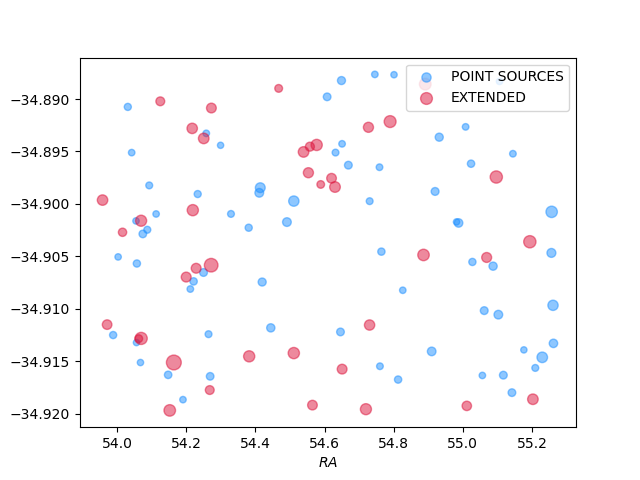

In [16]:
RA = FDS['RAJ2000'].data.data
DEC = FDS['DEJ2000'].data.data
FWHM = FDS['FWHM'].data.data
CLASS_STAR = FDS['CLASS_STAR'].data.data

plt.figure()
plt.scatter(RA[CLASS_STAR>0.9],DEC[CLASS_STAR>0.9], label=r'POINT SOURCES', 
            s=100.*FWHM[CLASS_STAR>0.9], c='dodgerblue', alpha=0.5, marker='.')
plt.scatter(RA[CLASS_STAR<0.1],DEC[CLASS_STAR<0.1], label=r'EXTENDED', 
            s=100.*FWHM[CLASS_STAR<0.1], c='crimson', alpha=0.5, marker='.')
plt.xlabel(r'$RA$')
plt.ylabel(r'$Dec.$')
plt.legend()
plt.show()

In [17]:
from ESOAsg.ancillary import astro
from ESOAsg import archive_observations

from astropy.coordinates import SkyCoord
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

In [18]:
fds_source = SkyCoord(55.279175, -34.919804, unit="deg")

result_from_queries = archive_observations.query_from_radec(fds_source, radius=5., data_types='image')

result_from_queries.show_in_notebook(show_row_index=False)

[WORKING] :: Running query 1 to the ESO archive (out of 1 total)
[INFO]    :: A total of 35 entries has been retrieved


In [19]:
from ESOAsg import archive_science_portal
archive_science_portal.query_from_radec(fds_source, radius=5., open_link=True, 
                                        data_types='catalog')